## 1st use with skimage

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np

## Display image

In [2]:
image1 = imread('landscape.jpg') #, as_gray=True)
#image1_Gray = rgb2gray(image1)
image1_Gray = imread('landscape.jpg', as_gray=True)

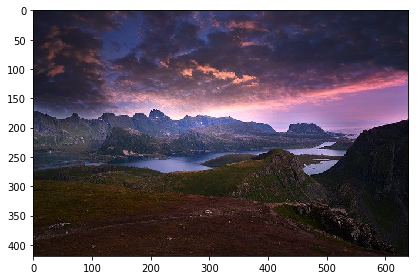

In [3]:
imshow(image1)

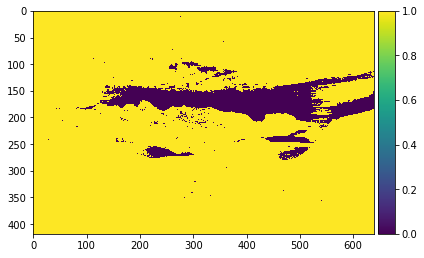

In [27]:
im = np.where(image1_Gray>128/256, 0, 1)
imshow(im)

In [28]:
im

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [4]:
image1_Gray.shape

(419, 640)

In [31]:
image1_Gray

array([[0.09889451, 0.09497294, 0.09497294, ..., 0.10034588, 0.10034588,
        0.10034588],
       [0.09889451, 0.09497294, 0.09497294, ..., 0.10034588, 0.10034588,
        0.10034588],
       [0.09889451, 0.09497294, 0.09497294, ..., 0.10034588, 0.10034588,
        0.10034588],
       ...,
       [0.08895216, 0.09679529, 0.08895216, ..., 0.05657647, 0.05825804,
        0.0627451 ],
       [0.09287373, 0.09679529, 0.09287373, ..., 0.05657647, 0.05825804,
        0.0627451 ],
       [0.09287373, 0.10071686, 0.09679529, ..., 0.05657647, 0.05825804,
        0.0627451 ]])

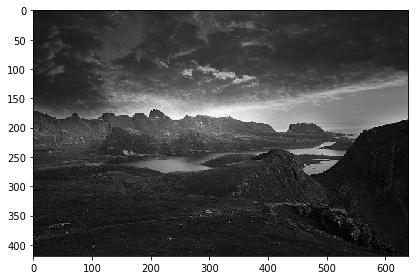

In [6]:
imshow(image1_Gray)

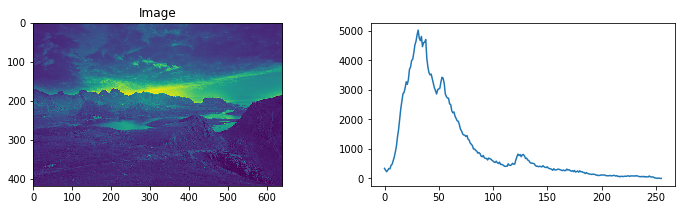

In [7]:
def histGrayScale(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
histGrayScale(image1_Gray)

In [8]:
image1_Gray.ndim

2

### Display histogram for image 1 (colored)

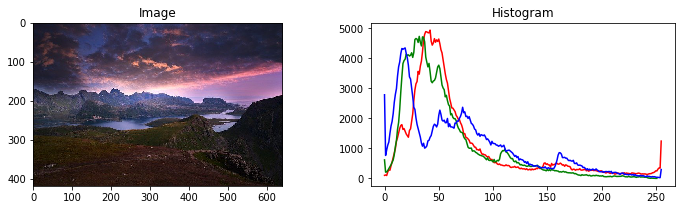

In [15]:
def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
histColor(image1)

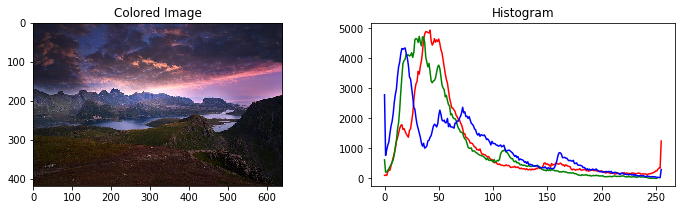

In [16]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    axis[0].imshow(image)
    axis[1].set_title('Histogram')
    if (image.ndim == 2):
        # Grascale Image
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].set_title('Colored Image')
        axis[1].plot(exposure.histogram(image[...,0])[0], color='red')
        axis[1].plot(exposure.histogram(image[...,1])[0], color='green')
        axis[1].plot(exposure.histogram(image[...,2])[0], color='blue')
imageHist(image1)

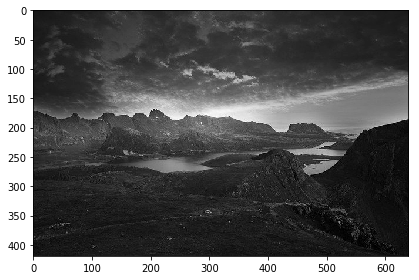

In [21]:
im = np.where(image1_Gray>250/256, 1, image1_Gray)
imshow(im)

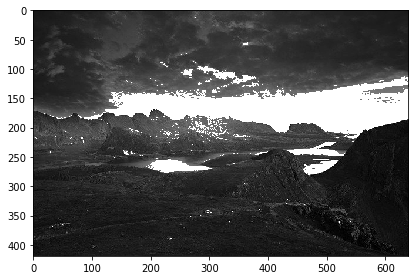

In [22]:

im = np.where(image1_Gray>=120/256, 1, image1_Gray)
imshow(im)

In [ ]:
histGrayScale(im)

## Threshold based on mean

In [ ]:
from skimage.filters import threshold_mean

In [ ]:
thresh = threshold_mean(image1) 
# return Upper threshold value. All pixels with an intensity higher than this value are assumed to be foreground.
print(thresh)

In [ ]:
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')
    
thresholdMeanDisplay(image1_Gray)

## Otsu Threshold

from skimage.filters import threshold_otsu, threshold_localCompute a threshold mask image based on local pixel neighborhood.

In [ ]:
from skimage.filters import threshold_otsu

In [ ]:
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')
    
thresholdOtsuDisplay(image1_Gray)

## Histograms

In [17]:
G = imread('G.jpg')
B = imread('B.jpg')
R = imread('R.jpg')

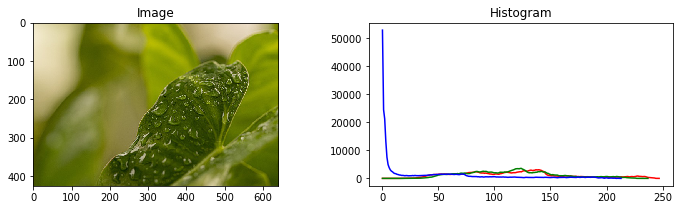

In [18]:
histColor(G)

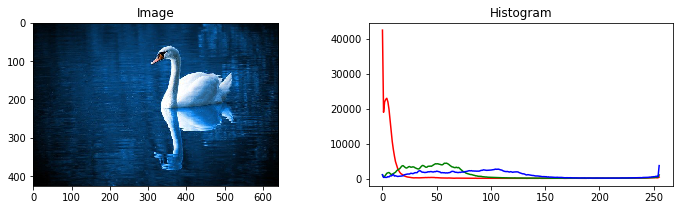

In [19]:
histColor(B)

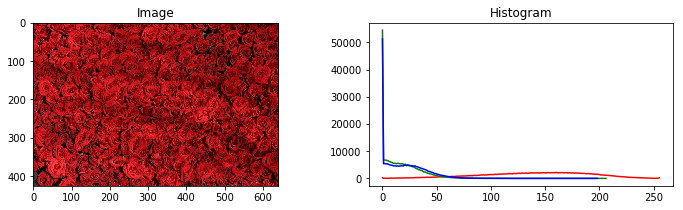

In [20]:
histColor(R)